In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("finaldataset.csv")

In [58]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad,happy
0,1tyfQdv8os4DVT1uXJt0EQ,Cicak Cicak Di Dinding,Uwa and Friends,0.908,0.377,3,-6.852,1,0.0786,0.010300,...,0.1390,0.945,100.038,116245,4,anak-anak,1,0,0,0
1,16fMdR8dlDiXd7Cae4TObs,Naik Kereta Api,Uwa and Friends,0.850,0.530,11,-4.008,1,0.0362,0.630000,...,0.2200,0.711,120.002,148152,4,anak-anak,1,0,0,0
2,5H91XsKg0po4zz18rRDEX9,Bintang Kecil,Uwa and Friends,0.641,0.390,1,-8.410,1,0.0275,0.004930,...,0.2250,0.349,112.043,167706,4,anak-anak,1,0,1,0
3,51kP80ZDifuKLEd5Rg6fdY,Burung Kakatua,Uwa and Friends,0.759,0.673,2,-3.615,1,0.0326,0.699000,...,0.1130,0.616,114.040,142560,3,anak-anak,0,0,0,0
4,1OPQWJQn8CQ3cX1jyF9Ful,Tik Tik Bunyi Hujan,Calista Amadea,0.622,0.463,11,-6.707,1,0.0300,0.858000,...,0.0773,0.519,110.162,202773,4,anak-anak,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.554,5,-6.978,1,0.0290,0.490000,...,0.1550,0.512,87.051,266472,4,dewasa,1,0,1,0
838,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.957,2,-3.797,1,0.0610,0.000197,...,0.0242,0.785,175.954,184128,4,dewasa,1,1,0,1
839,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.297000,...,0.3840,0.758,178.818,137876,4,dewasa,1,1,0,1
840,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.659,8,-7.903,1,0.0330,0.000011,...,0.1390,0.181,104.028,175040,5,dewasa,0,0,1,0


## PROSES MENCARI JENIS SUASANA HATI DENGAN CLUSTERING

## calm/santai

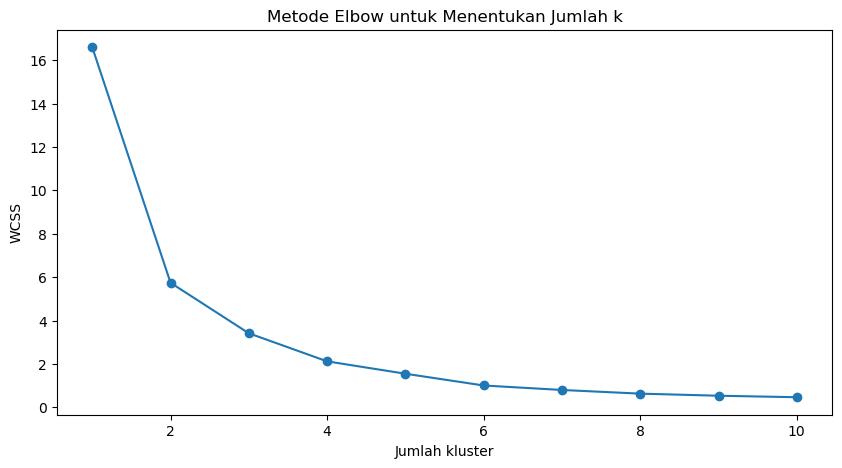

In [4]:
X = df[['instrumentalness', 'speechiness']]

# Inisialisasi list untuk menyimpan nilai WCSS (Within-Cluster Sum of Square)
wcss = []

# Loop untuk menghitung nilai WCSS untuk jumlah kluster dari 1 hingga 10
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    # Membuat objek KMeans dengan jumlah kluster i
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Melakukan fitting KMeans pada data
    kmeans.fit(X)
    # Menambahkan nilai inersia (WCSS) untuk kluster i ke dalam list wcss
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [0.00329655 0.04944993]
Cluster 1: [0.50875 0.05202]
Cluster 2: [0.22814815 0.04327407]
Cluster 3: [0.00773512 0.27585417]
Cluster 4: [0.8384  0.03537]


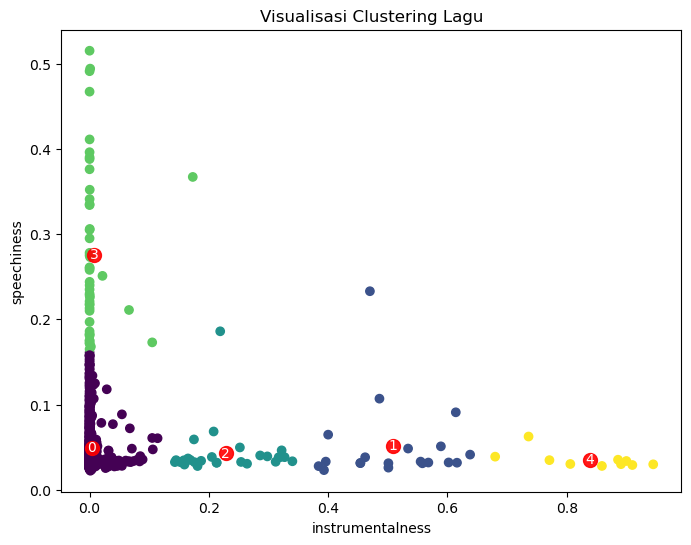

In [5]:
data = df

kmeans = KMeans(n_clusters=5)
df_clustered = df[['instrumentalness', 'speechiness']]
kmeans.fit(df_clustered)

# Menampilkan centroid dari setiap cluster
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")
    
# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['instrumentalness'], df['speechiness'], c=kmeans.labels_, cmap='viridis')

# Menandai pusat cluster dengan labelnya
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9)  # Pusat cluster
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') # Menambahkan label

# Label sumbu seharusnya sesuai dengan data yang digunakan untuk clustering
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('instrumentalness')  # Sumbu X seharusnya 'energy'
plt.ylabel('speechiness')  # Sumbu Y seharusnya 'valence'
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

X = df_clustered  # Data yang sudah digunakan untuk clustering
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.800


In [7]:
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [8]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur,cluster
0,1tyfQdv8os4DVT1uXJt0EQ,Cicak Cicak Di Dinding,Uwa and Friends,0.908,0.377,3,-6.852,1,0.0786,0.010300,0.019700,0.1390,0.945,100.038,116245,4,anak-anak,0
1,16fMdR8dlDiXd7Cae4TObs,Naik Kereta Api,Uwa and Friends,0.850,0.530,11,-4.008,1,0.0362,0.630000,0.029600,0.2200,0.711,120.002,148152,4,anak-anak,0
2,5H91XsKg0po4zz18rRDEX9,Bintang Kecil,Uwa and Friends,0.641,0.390,1,-8.410,1,0.0275,0.004930,0.000892,0.2250,0.349,112.043,167706,4,anak-anak,0
3,51kP80ZDifuKLEd5Rg6fdY,Burung Kakatua,Uwa and Friends,0.759,0.673,2,-3.615,1,0.0326,0.699000,0.152000,0.1130,0.616,114.040,142560,3,anak-anak,2
4,1OPQWJQn8CQ3cX1jyF9Ful,Tik Tik Bunyi Hujan,Calista Amadea,0.622,0.463,11,-6.707,1,0.0300,0.858000,0.000000,0.0773,0.519,110.162,202773,4,anak-anak,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.554,5,-6.978,1,0.0290,0.490000,0.000010,0.1550,0.512,87.051,266472,4,dewasa,0
838,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.957,2,-3.797,1,0.0610,0.000197,0.000000,0.0242,0.785,175.954,184128,4,dewasa,0
839,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.297000,0.000000,0.3840,0.758,178.818,137876,4,dewasa,0
840,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.659,8,-7.903,1,0.0330,0.000011,0.312000,0.1390,0.181,104.028,175040,5,dewasa,2


In [9]:
# Menandai baris yang merupakan bagian dari cluster 0 dengan 1, yang lain dengan 0
df['calm'] = df['cluster'].apply(lambda x: 1 if x == 0 else 0)

In [108]:
df.to_excel(r'testcalmm.xlsx', index=False)

In [59]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad,happy
0,1tyfQdv8os4DVT1uXJt0EQ,Cicak Cicak Di Dinding,Uwa and Friends,0.908,0.377,3,-6.852,1,0.0786,0.010300,...,0.1390,0.945,100.038,116245,4,anak-anak,1,0,0,0
1,16fMdR8dlDiXd7Cae4TObs,Naik Kereta Api,Uwa and Friends,0.850,0.530,11,-4.008,1,0.0362,0.630000,...,0.2200,0.711,120.002,148152,4,anak-anak,1,0,0,0
2,5H91XsKg0po4zz18rRDEX9,Bintang Kecil,Uwa and Friends,0.641,0.390,1,-8.410,1,0.0275,0.004930,...,0.2250,0.349,112.043,167706,4,anak-anak,1,0,1,0
3,51kP80ZDifuKLEd5Rg6fdY,Burung Kakatua,Uwa and Friends,0.759,0.673,2,-3.615,1,0.0326,0.699000,...,0.1130,0.616,114.040,142560,3,anak-anak,0,0,0,0
4,1OPQWJQn8CQ3cX1jyF9Ful,Tik Tik Bunyi Hujan,Calista Amadea,0.622,0.463,11,-6.707,1,0.0300,0.858000,...,0.0773,0.519,110.162,202773,4,anak-anak,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.554,5,-6.978,1,0.0290,0.490000,...,0.1550,0.512,87.051,266472,4,dewasa,1,0,1,0
838,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.957,2,-3.797,1,0.0610,0.000197,...,0.0242,0.785,175.954,184128,4,dewasa,1,1,0,1
839,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.297000,...,0.3840,0.758,178.818,137876,4,dewasa,1,1,0,1
840,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.659,8,-7.903,1,0.0330,0.000011,...,0.1390,0.181,104.028,175040,5,dewasa,0,0,1,0


In [11]:
df = df.drop(['cluster'], axis=1)

## energetic/semangat

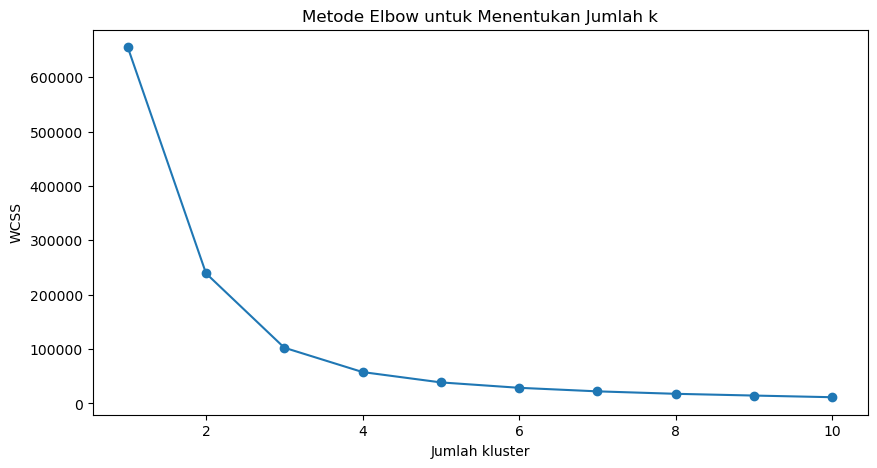

In [13]:
X = df[['danceability', 'tempo']]

wcss = []
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [ 0.57467901 87.33918519]
Cluster 1: [  0.63212558 137.7277907 ]
Cluster 2: [  0.51705102 172.00043878]
Cluster 3: [  0.67773427 115.46547203]


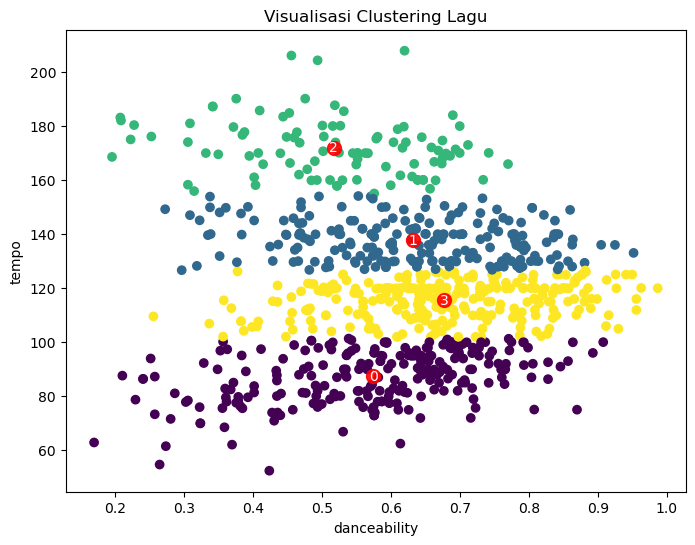

In [14]:
data = df

kmeans = KMeans(n_clusters=4)
df_clustered = df[['danceability', 'tempo']]
kmeans.fit(df_clustered)

# Menampilkan centroid dari setiap cluster
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['danceability'], df['tempo'], c=kmeans.labels_, cmap='viridis')

# Menandai pusat cluster dengan labelnya
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9)  # Pusat cluster
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') # Menambahkan label

# Label sumbu seharusnya sesuai dengan data yang digunakan untuk clustering
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('danceability')  # Sumbu X seharusnya 'energy'
plt.ylabel('tempo')  # Sumbu Y seharusnya 'valence'
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

X = df_clustered  # Data yang sudah digunakan untuk clustering
labels = kmeans.labels_

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)

print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.573


In [16]:
# Ekstrak label cluster
cluster_labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

In [17]:
df['energic'] = df['cluster'].apply(lambda x: 1 if x == 2 else 0)

In [18]:
df = df.drop(['cluster'], axis=1)

In [19]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic
0,1tyfQdv8os4DVT1uXJt0EQ,Cicak Cicak Di Dinding,Uwa and Friends,0.908,0.377,3,-6.852,1,0.0786,0.010300,0.019700,0.1390,0.945,100.038,116245,4,anak-anak,1,0
1,16fMdR8dlDiXd7Cae4TObs,Naik Kereta Api,Uwa and Friends,0.850,0.530,11,-4.008,1,0.0362,0.630000,0.029600,0.2200,0.711,120.002,148152,4,anak-anak,1,0
2,5H91XsKg0po4zz18rRDEX9,Bintang Kecil,Uwa and Friends,0.641,0.390,1,-8.410,1,0.0275,0.004930,0.000892,0.2250,0.349,112.043,167706,4,anak-anak,1,0
3,51kP80ZDifuKLEd5Rg6fdY,Burung Kakatua,Uwa and Friends,0.759,0.673,2,-3.615,1,0.0326,0.699000,0.152000,0.1130,0.616,114.040,142560,3,anak-anak,0,0
4,1OPQWJQn8CQ3cX1jyF9Ful,Tik Tik Bunyi Hujan,Calista Amadea,0.622,0.463,11,-6.707,1,0.0300,0.858000,0.000000,0.0773,0.519,110.162,202773,4,anak-anak,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.554,5,-6.978,1,0.0290,0.490000,0.000010,0.1550,0.512,87.051,266472,4,dewasa,1,0
838,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.957,2,-3.797,1,0.0610,0.000197,0.000000,0.0242,0.785,175.954,184128,4,dewasa,1,1
839,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.297000,0.000000,0.3840,0.758,178.818,137876,4,dewasa,1,1
840,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.659,8,-7.903,1,0.0330,0.000011,0.312000,0.1390,0.181,104.028,175040,5,dewasa,0,0


## SAD/ SEDIH

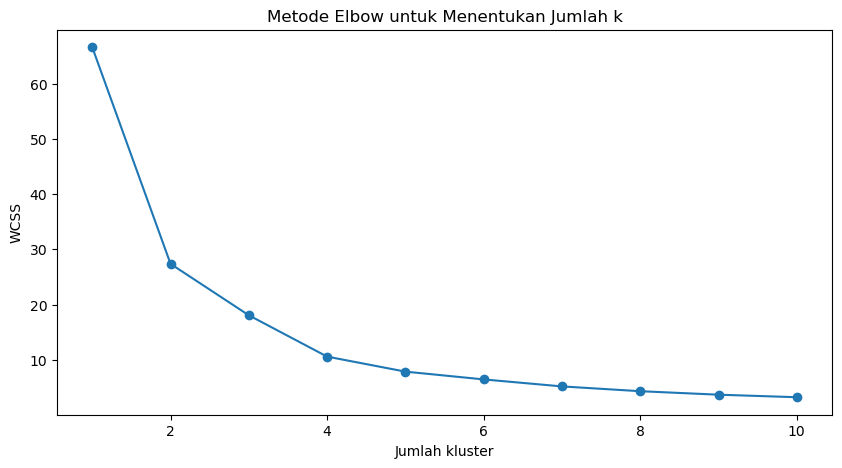

In [22]:
X = df[['instrumentalness', 'valence']]

wcss = []
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [0.60868966 0.76862069]
Cluster 1: [0.01496217 0.3298833 ]
Cluster 2: [0.00885472 0.75725266]


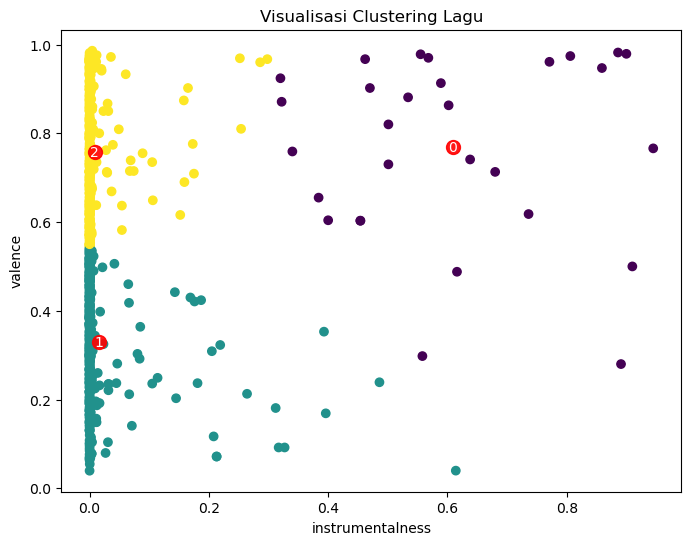

In [25]:
data = df

kmeans = KMeans(n_clusters=3)
df_clustered = df[['instrumentalness', 'valence']]
kmeans.fit(df_clustered)
 
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")
 
plt.figure(figsize=(8, 6))
plt.scatter(df['instrumentalness'], df['valence'], c=kmeans.labels_, cmap='viridis')
 
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9) 
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') 
 
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('instrumentalness') 
plt.ylabel('valence') 
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

X = df_clustered  # Data yang sudah digunakan untuk clustering
labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)

print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.581


In [27]:
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels

In [221]:
df.to_excel(r'tessadd.xlsx', index=False)

In [29]:
df['sad'] = df['cluster'].apply(lambda x: 1 if x == 1 else 0)

In [31]:
df = df.drop(['cluster'], axis=1)

In [32]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad
0,1tyfQdv8os4DVT1uXJt0EQ,Cicak Cicak Di Dinding,Uwa and Friends,0.908,0.377,3,-6.852,1,0.0786,0.010300,0.019700,0.1390,0.945,100.038,116245,4,anak-anak,1,0,0
1,16fMdR8dlDiXd7Cae4TObs,Naik Kereta Api,Uwa and Friends,0.850,0.530,11,-4.008,1,0.0362,0.630000,0.029600,0.2200,0.711,120.002,148152,4,anak-anak,1,0,0
2,5H91XsKg0po4zz18rRDEX9,Bintang Kecil,Uwa and Friends,0.641,0.390,1,-8.410,1,0.0275,0.004930,0.000892,0.2250,0.349,112.043,167706,4,anak-anak,1,0,1
3,51kP80ZDifuKLEd5Rg6fdY,Burung Kakatua,Uwa and Friends,0.759,0.673,2,-3.615,1,0.0326,0.699000,0.152000,0.1130,0.616,114.040,142560,3,anak-anak,0,0,0
4,1OPQWJQn8CQ3cX1jyF9Ful,Tik Tik Bunyi Hujan,Calista Amadea,0.622,0.463,11,-6.707,1,0.0300,0.858000,0.000000,0.0773,0.519,110.162,202773,4,anak-anak,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.554,5,-6.978,1,0.0290,0.490000,0.000010,0.1550,0.512,87.051,266472,4,dewasa,1,0,1
838,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.957,2,-3.797,1,0.0610,0.000197,0.000000,0.0242,0.785,175.954,184128,4,dewasa,1,1,0
839,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.297000,0.000000,0.3840,0.758,178.818,137876,4,dewasa,1,1,0
840,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.659,8,-7.903,1,0.0330,0.000011,0.312000,0.1390,0.181,104.028,175040,5,dewasa,0,0,1


## happy/senang

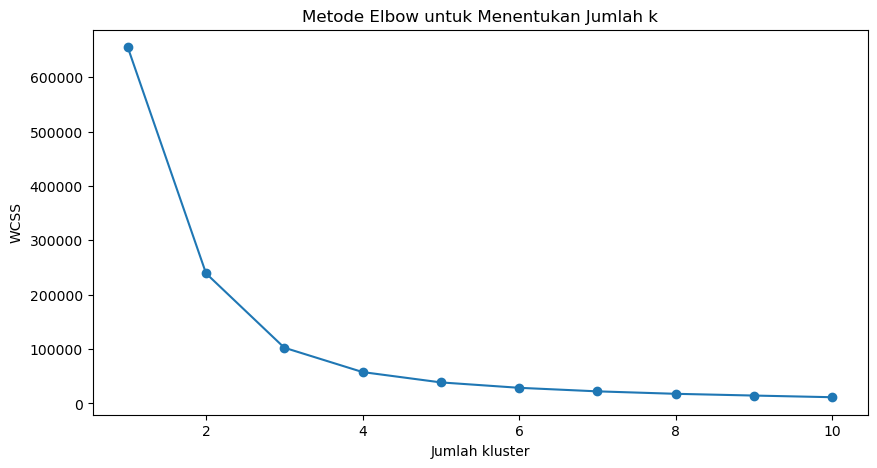

In [33]:
X = df[['energy', 'tempo']]

wcss = []
for i in range(1, 11):  # Mencoba k dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah k')
plt.xlabel('Jumlah kluster')
plt.ylabel('WCSS')
plt.show()

C:\Users\wahyu\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroid dari setiap cluster:
Cluster 0: [  0.56730694 146.22606069]
Cluster 1: [  0.51388669 101.04808065]


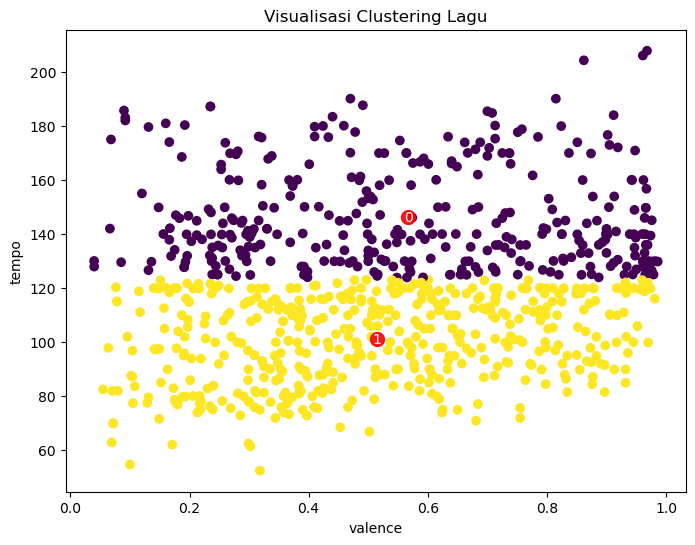

In [34]:
data = df

kmeans = KMeans(n_clusters=2)
df_clustered = df[['valence', 'tempo']]
kmeans.fit(df_clustered)

# Menampilkan centroid dari setiap cluster
centers = kmeans.cluster_centers_
print("Centroid dari setiap cluster:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['valence'], df['tempo'], c=kmeans.labels_, cmap='viridis')

# Menandai pusat cluster dengan labelnya
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='red', s=100, alpha=0.9)  # Pusat cluster
    plt.text(center[0], center[1], str(i), color='white', ha='center', va='center') # Menambahkan label

# Label sumbu seharusnya sesuai dengan data yang digunakan untuk clustering
plt.title('Visualisasi Clustering Lagu')
plt.xlabel('valence')  # Sumbu X seharusnya 'energy'
plt.ylabel('tempo')  # Sumbu Y seharusnya 'valence'
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

X = df_clustered
labels = kmeans.labels_

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Coefficient: {:.3f}".format(silhouette_avg))

Silhouette Coefficient: 0.542


In [36]:
# Ekstrak label cluster
cluster_labels = kmeans.labels_

# Menambahkan label cluster ke DataFrame
df['cluster'] = cluster_labels

In [259]:
df.to_excel(r'teshappyy.xlsx', index=False)

In [39]:
df 

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad,cluster,happy
0,1tyfQdv8os4DVT1uXJt0EQ,Cicak Cicak Di Dinding,Uwa and Friends,0.908,0.377,3,-6.852,1,0.0786,0.010300,...,0.945,100.038,116245,4,anak-anak,1,0,0,1,0
1,16fMdR8dlDiXd7Cae4TObs,Naik Kereta Api,Uwa and Friends,0.850,0.530,11,-4.008,1,0.0362,0.630000,...,0.711,120.002,148152,4,anak-anak,1,0,0,1,0
2,5H91XsKg0po4zz18rRDEX9,Bintang Kecil,Uwa and Friends,0.641,0.390,1,-8.410,1,0.0275,0.004930,...,0.349,112.043,167706,4,anak-anak,1,0,1,1,0
3,51kP80ZDifuKLEd5Rg6fdY,Burung Kakatua,Uwa and Friends,0.759,0.673,2,-3.615,1,0.0326,0.699000,...,0.616,114.040,142560,3,anak-anak,0,0,0,1,0
4,1OPQWJQn8CQ3cX1jyF9Ful,Tik Tik Bunyi Hujan,Calista Amadea,0.622,0.463,11,-6.707,1,0.0300,0.858000,...,0.519,110.162,202773,4,anak-anak,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.554,5,-6.978,1,0.0290,0.490000,...,0.512,87.051,266472,4,dewasa,1,0,1,1,0
838,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.957,2,-3.797,1,0.0610,0.000197,...,0.785,175.954,184128,4,dewasa,1,1,0,0,1
839,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.297000,...,0.758,178.818,137876,4,dewasa,1,1,0,0,1
840,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.659,8,-7.903,1,0.0330,0.000011,...,0.181,104.028,175040,5,dewasa,0,0,1,1,0


In [38]:
# Menandai baris yang merupakan bagian dari cluster 0 dengan 1, yang lain dengan 0
df['happy'] = df['cluster'].apply(lambda x: 1 if x == 0 else 0)

In [40]:
df = df.drop(['cluster'], axis=1)

In [41]:
df

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,umur,calm,energic,sad,happy
0,1tyfQdv8os4DVT1uXJt0EQ,Cicak Cicak Di Dinding,Uwa and Friends,0.908,0.377,3,-6.852,1,0.0786,0.010300,...,0.1390,0.945,100.038,116245,4,anak-anak,1,0,0,0
1,16fMdR8dlDiXd7Cae4TObs,Naik Kereta Api,Uwa and Friends,0.850,0.530,11,-4.008,1,0.0362,0.630000,...,0.2200,0.711,120.002,148152,4,anak-anak,1,0,0,0
2,5H91XsKg0po4zz18rRDEX9,Bintang Kecil,Uwa and Friends,0.641,0.390,1,-8.410,1,0.0275,0.004930,...,0.2250,0.349,112.043,167706,4,anak-anak,1,0,1,0
3,51kP80ZDifuKLEd5Rg6fdY,Burung Kakatua,Uwa and Friends,0.759,0.673,2,-3.615,1,0.0326,0.699000,...,0.1130,0.616,114.040,142560,3,anak-anak,0,0,0,0
4,1OPQWJQn8CQ3cX1jyF9Ful,Tik Tik Bunyi Hujan,Calista Amadea,0.622,0.463,11,-6.707,1,0.0300,0.858000,...,0.0773,0.519,110.162,202773,4,anak-anak,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,3usbnvDFtOhY09cRNar8Zg,FRIENDS,LAUNDRY DAY,0.522,0.554,5,-6.978,1,0.0290,0.490000,...,0.1550,0.512,87.051,266472,4,dewasa,1,0,1,0
838,2h4BV7jx9Ltz9NxC2zgNcW,"Now or Never (feat. Charlie Gillespie, Owen Pa...",Julie and the Phantoms Cast,0.449,0.957,2,-3.797,1,0.0610,0.000197,...,0.0242,0.785,175.954,184128,4,dewasa,1,1,0,1
839,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.297000,...,0.3840,0.758,178.818,137876,4,dewasa,1,1,0,1
840,7CBXta3Je26MMHOFGERplS,Miss The Rage - Remix,Toxic Tripz,0.514,0.659,8,-7.903,1,0.0330,0.000011,...,0.1390,0.181,104.028,175040,5,dewasa,0,0,1,0


In [46]:
df.to_csv(r'finaldataset.csv', index=False)

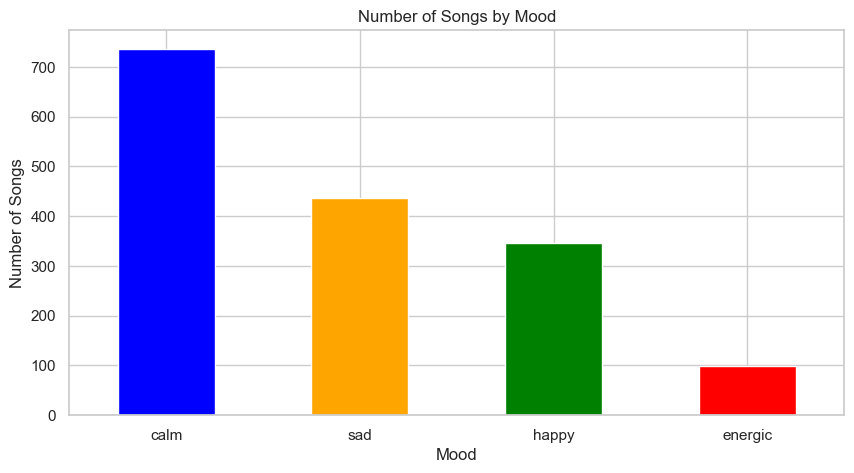

In [68]:
import matplotlib.pyplot as plt

mood_counts = df[['calm', 'energic', 'sad', 'happy']].sum().sort_values(ascending=False)

# Now we plot the bar chart
plt.figure(figsize=(10,5))
mood_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Number of Songs by Mood')
plt.xlabel('Mood')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()


In [62]:
# Let's recheck the count for the 'calm' category to confirm its accuracy.
kolom_count = df['happy'].sum()
kolom_count


346

## PEMBUATAN MODEL SISTEM

In [45]:
import pickle
import pandas as pd 
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def recommend_by_mood_and_age(mood, age_group, df, features):
    # Menentukan kolom mood berdasarkan input
    mood_column = mood.lower()

    # Mendapatkan lagu-lagu yang sesuai dengan mood dan kelompok umur yang diminta
    filtered_songs = df[(df[mood_column] == 1) & (df['umur'] == age_group)]

    if not filtered_songs.empty:
        # Menghitung kesamaan antara lagu-lagu menggunakan content-based filtering
        # Fitur normalisasi untuk menghitung similarity
        scaler = StandardScaler()
        song_features = scaler.fit_transform(filtered_songs[features])

        # Menghitung similarity matrix
        similarity_matrix = cosine_similarity(song_features)
        
        # Asumsikan lagu pertama sebagai lagu yang ingin dicari kesamaannya
        # Ini bisa diganti dengan sistem yang lebih kompleks untuk menentukan referensi
        reference_song_index = 0
        song_similarity = similarity_matrix[reference_song_index]

        # Mendapatkan indeks lagu yang paling mirip
        similar_songs_idx = np.argsort(-song_similarity)

        # Mengambil sampel acak dari lagu-lagu yang mirip
        num_songs_to_recommend = min(5, len(filtered_songs))
        recommended_songs = filtered_songs.iloc[similar_songs_idx[:num_songs_to_recommend]]['track_name'].tolist()

        # Menyimpan hasil ke dalam file pickle
        with open('rekomendasi_mood_age.pkl', 'wb') as f:
            pickle.dump(recommended_songs, f)

        return recommended_songs
    else:
        return "Tidak ditemukan lagu dengan mood dan kelompok umur tersebut dalam dataset."

# Contoh fitur yang akan digunakan untuk menghitung kemiripan
features = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence',  'speechiness']

# Misalkan kita memiliki DataFrame 'df' yang berisi data lagu, termasuk fitur-fitur di atas
# Karena kita tidak memiliki DataFrame nyata, ini hanya sebagai placeholder
# df = pd.read_csv('path_to_your_dataset.csv')

# Contoh penggunaan fungsi yang diperbarui
mood_example = "happy"
age_group_example = "remaja"  # Contoh kelompok umur
recommendations_mood_age = recommend_by_mood_and_age(mood_example, age_group_example, df, features)
print(recommendations_mood_age)


['Jatuh Hati', 'Runtuh', 'Tak Ingin Usai', 'Kembali Pulang', 'Tak Kan Hilang']


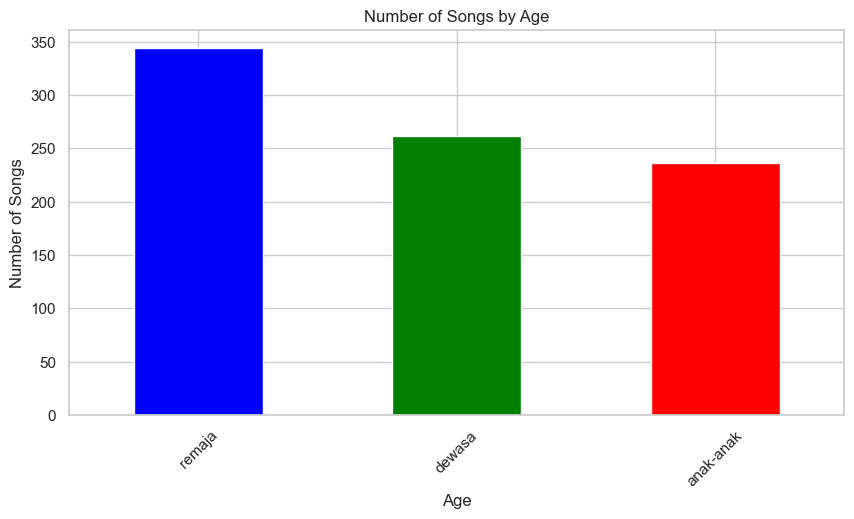

In [71]:
# Assigning a different color to each age group
colors = ['blue', 'green', 'red', 'purple', 'yellow', 'orange', 'pink', 'grey', 'brown', 'cyan']

# Ensure there are enough colors for each age group
if len(age_counts) > len(colors):
    colors = colors * (len(age_counts) // len(colors) + 1)

# Plotting the bar chart with different colors for each age group
plt.figure(figsize=(10,5))
age_counts.plot(kind='bar', color=colors[:len(age_counts)])
plt.title('Number of Songs by Age')
plt.xlabel('Age')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()


In [95]:
with open('recommendations.pkl', 'rb') as f:
    loaded_objects = pickle.load(f)
print(type(loaded_objects[0]))

FileNotFoundError: [Errno 2] No such file or directory: 'recommendations.pkl'